In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [10]:
from rrc.env import make_env
from trifinger_simulation.tasks.move_cube import Pose
from rrc_iprl_package.control import controller_utils_cube as c_utils

env = make_env.env_fn_generator(
    diff=1, env_cls="robot_wrench_env", visualization=False, use_traj_opt=False,
    initializer='dumb_init', flatten_goal=False
)()

In [11]:
obs = env.reset()

In [12]:
obj_pose = Pose.from_dict(env.prev_observation["achieved_goal"])
des_cp_pos = np.array([x[0] for x in env.get_cp_of_list(env.cp_params, obj_pose, env.use_actual_cp)])

In [13]:
tip_positions = [] 
des_tip_positions = []
n_episodes = 50
for i in range(n_episodes):
    obs = env.reset()
    obj_pose = Pose.from_dict(env.prev_observation["achieved_goal"])
    cp_list = env.get_cp_wf_list(env.cp_params, obj_pose)
    des_tip_pos = np.asarray([cp[0] for cp in cp_list])
    current_tip_pos = env.prev_observation['observation']['tip_positions']
    if np.linalg.norm(current_tip_pos - des_tip_pos) > 0.05:
        env.execute_grasp()
    des_tip_pos = np.asarray([cp[0] for cp in cp_list])
    current_tip_pos = env.prev_observation['observation']['tip_positions']        
    tip_positions.append(current_tip_pos)
    des_tip_positions.append(des_tip_pos)

In [3]:
# obs = env.reset()
# current_tip_pos = env.prev_observation['observation']['tip_positions']
obj_pose = Pose.from_dict(env.prev_observation['achieved_goal'])
c_utils.get_of_from_wf(current_tip_pos, obj_pose)

array([[ 0.04404254, -0.12709241,  0.03389202],
       [-0.08708513, -0.08474551,  0.03380303],
       [ 0.02099654,  0.00797261,  0.04130636]])

(array([5., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.01453273, 0.0253115 , 0.03609027, 0.04686904, 0.05764781,
        0.06842658, 0.07920535, 0.08998412, 0.10076289, 0.11154166,
        0.12232043]),
 <BarContainer object of 10 artists>)

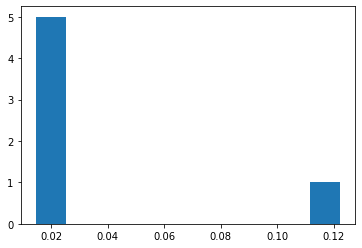

In [8]:
plt.hist([np.linalg.norm(tp - dtp) for tp, dtp in zip(tip_positions, des_tip_positions)])

(array([12.,  4., 13.,  6.,  1.,  0.,  1.,  5.,  3.,  5.]),
 array([0.01438022, 0.03261799, 0.05085577, 0.06909355, 0.08733133,
        0.10556911, 0.12380688, 0.14204466, 0.16028244, 0.17852022,
        0.196758  ]),
 <BarContainer object of 10 artists>)

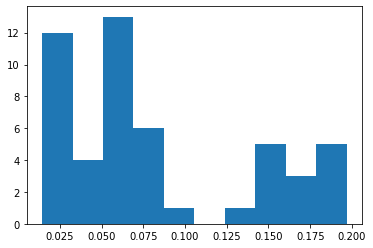

In [3]:
plt.hist([np.linalg.norm(tp - dtp) for tp, dtp in zip(tip_positions, des_tip_positions)])

(array([13.,  0.,  9., 11.,  3.,  1.,  0.,  2.,  4.,  7.]),
 array([0.01488869, 0.03052265, 0.04615661, 0.06179057, 0.07742453,
        0.09305849, 0.10869245, 0.12432641, 0.13996037, 0.15559432,
        0.17122828]),
 <BarContainer object of 10 artists>)

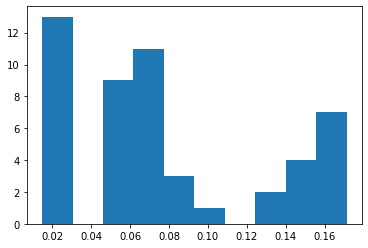

In [6]:
plt.hist([np.linalg.norm(tp - dtp) for tp, dtp in zip(tip_positions, des_tip_positions)])

(array([20.,  1.,  8.,  8.,  0.,  0.,  1.,  5.,  4.,  3.]),
 array([0.01478285, 0.03154379, 0.04830473, 0.06506568, 0.08182662,
        0.09858756, 0.1153485 , 0.13210945, 0.14887039, 0.16563133,
        0.18239227]),
 <BarContainer object of 10 artists>)

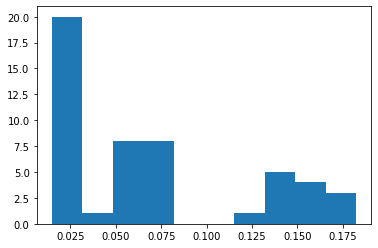

In [4]:
plt.hist([np.linalg.norm(tp - dtp) for tp, dtp in zip(tip_positions, des_tip_positions)])